## Pima Indian Diabetics Logistic Regression Model
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### Objective
Build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
colnames= ('Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI', 'DP_Function',	'Age',	'Outcome')
df = pd.read_csv("diabetes.csv", names= colnames, header=0)
#df = pd.read_csv("diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DP_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DP_Function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BP             768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DP_Function    768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data_to_plot = df[['Pregnancies', 'Glucose', 'BP', 'SkinThickness',	'Insulin', 'BMI', 'DP_Function', 'Age']] 

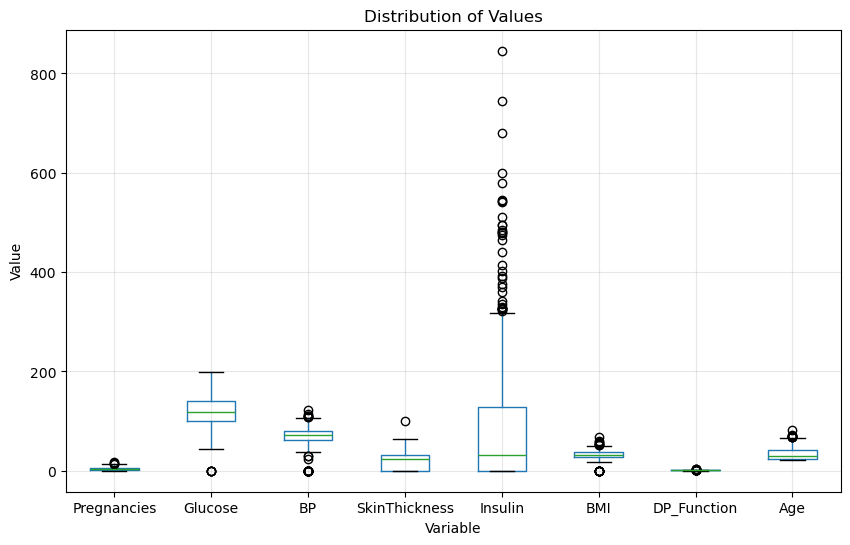

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
data_to_plot.boxplot(ax=ax)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Distribution of Values')
plt.grid(alpha=0.3)
plt.show()

In [16]:
# Lets see if there is any missing data
for col in df.columns:
     pct_missing = np.mean(df[col].isnull())
     print('{} - {}%'.format(col, pct_missing))

Pregnancies - 0.0%
Glucose - 0.0%
BP - 0.0%
SkinThickness - 0.0%
Insulin - 0.0%
BMI - 0.0%
DP_Function - 0.0%
Age - 0.0%
Outcome - 0.0%


In [19]:
#Check if any columns/rows have any value other than numeric
df[df.map(np.isreal).all(1)]

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DP_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Conclusion: All records and columns are numericals

In [23]:
df.dtypes

Pregnancies        int64
Glucose            int64
BP                 int64
SkinThickness      int64
Insulin            int64
BMI              float64
DP_Function      float64
Age                int64
Outcome            int64
dtype: object

#### Replace all zeros values with mean for all columns except "Outcome"

In [26]:
df1=df[['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','DP_Function','Age']]
df2=df[['Outcome']]

#use the following line to deal with FutureWarning related to downcasting when using fillna
pd.set_option('future.no_silent_downcasting', True)

#Replace zero with mean values
df1 = df1.replace(0, pd.NA)
mean_values = df1.mean()
df1 = df1.fillna(mean_values)

In [28]:
#Joint "Outcome" column back to the dataframe
df_new = df1.join(df2, how='left')
df_new.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DP_Function,Age,Outcome
0,6,148,72,35,155.548223,33.6,0.627,50,1
1,1,85,66,29,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,4.494673,137,40,35,168,43.1,2.288,33,1


In [30]:
#Check to see whether zero value are replaced
data_to_plot = df_new[['Pregnancies',	'Glucose',	'BP',	'SkinThickness',	'Insulin',	'BMI',	'DP_Function',	'Age']]

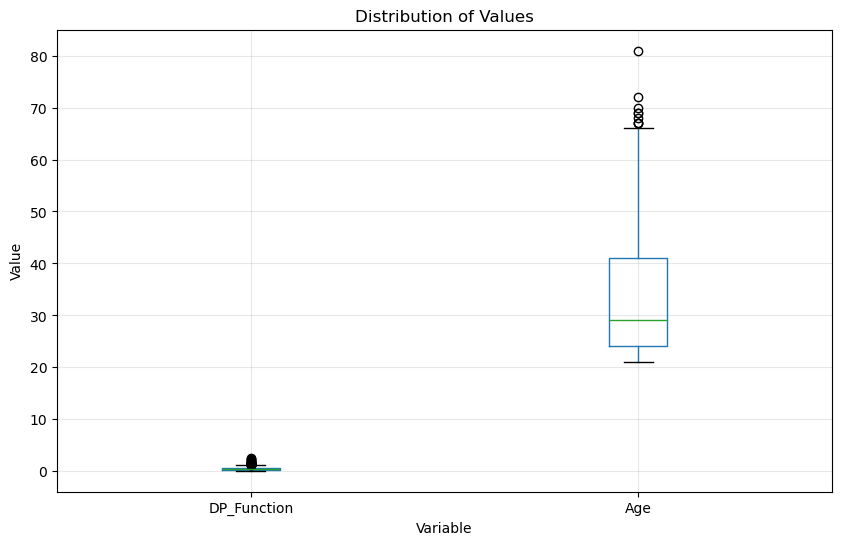

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
data_to_plot.boxplot(ax=ax)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Distribution of Values')
plt.grid(alpha=0.3)
plt.show()

In [34]:
#Relationship between independent variables and target variable
corr=df_new.corr(method='pearson', min_periods=1, numeric_only=False)
corr

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DP_Function,Age,Outcome
Pregnancies,1.000000,0.154290,0.259117,0.131819,0.068077,0.110590,-0.005658,0.511662,0.248263
Glucose,0.154290,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BP,0.259117,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.131819,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.068077,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.110590,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DP_Function,-0.005658,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.511662,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.248263,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


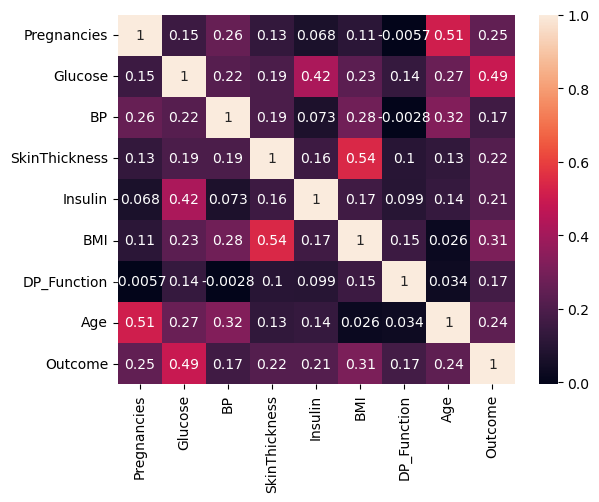

In [36]:
sns.heatmap(corr, annot = True)
plt.show()

##### Relationship between variables with outcome is not high. However amoung them Glucose has highest, next (BMI and Age, Pregnancies) and then (Insulin and DP_Function) relationship with outcome

In [39]:
df_new.groupby(["Outcome"]).count()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DP_Function,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


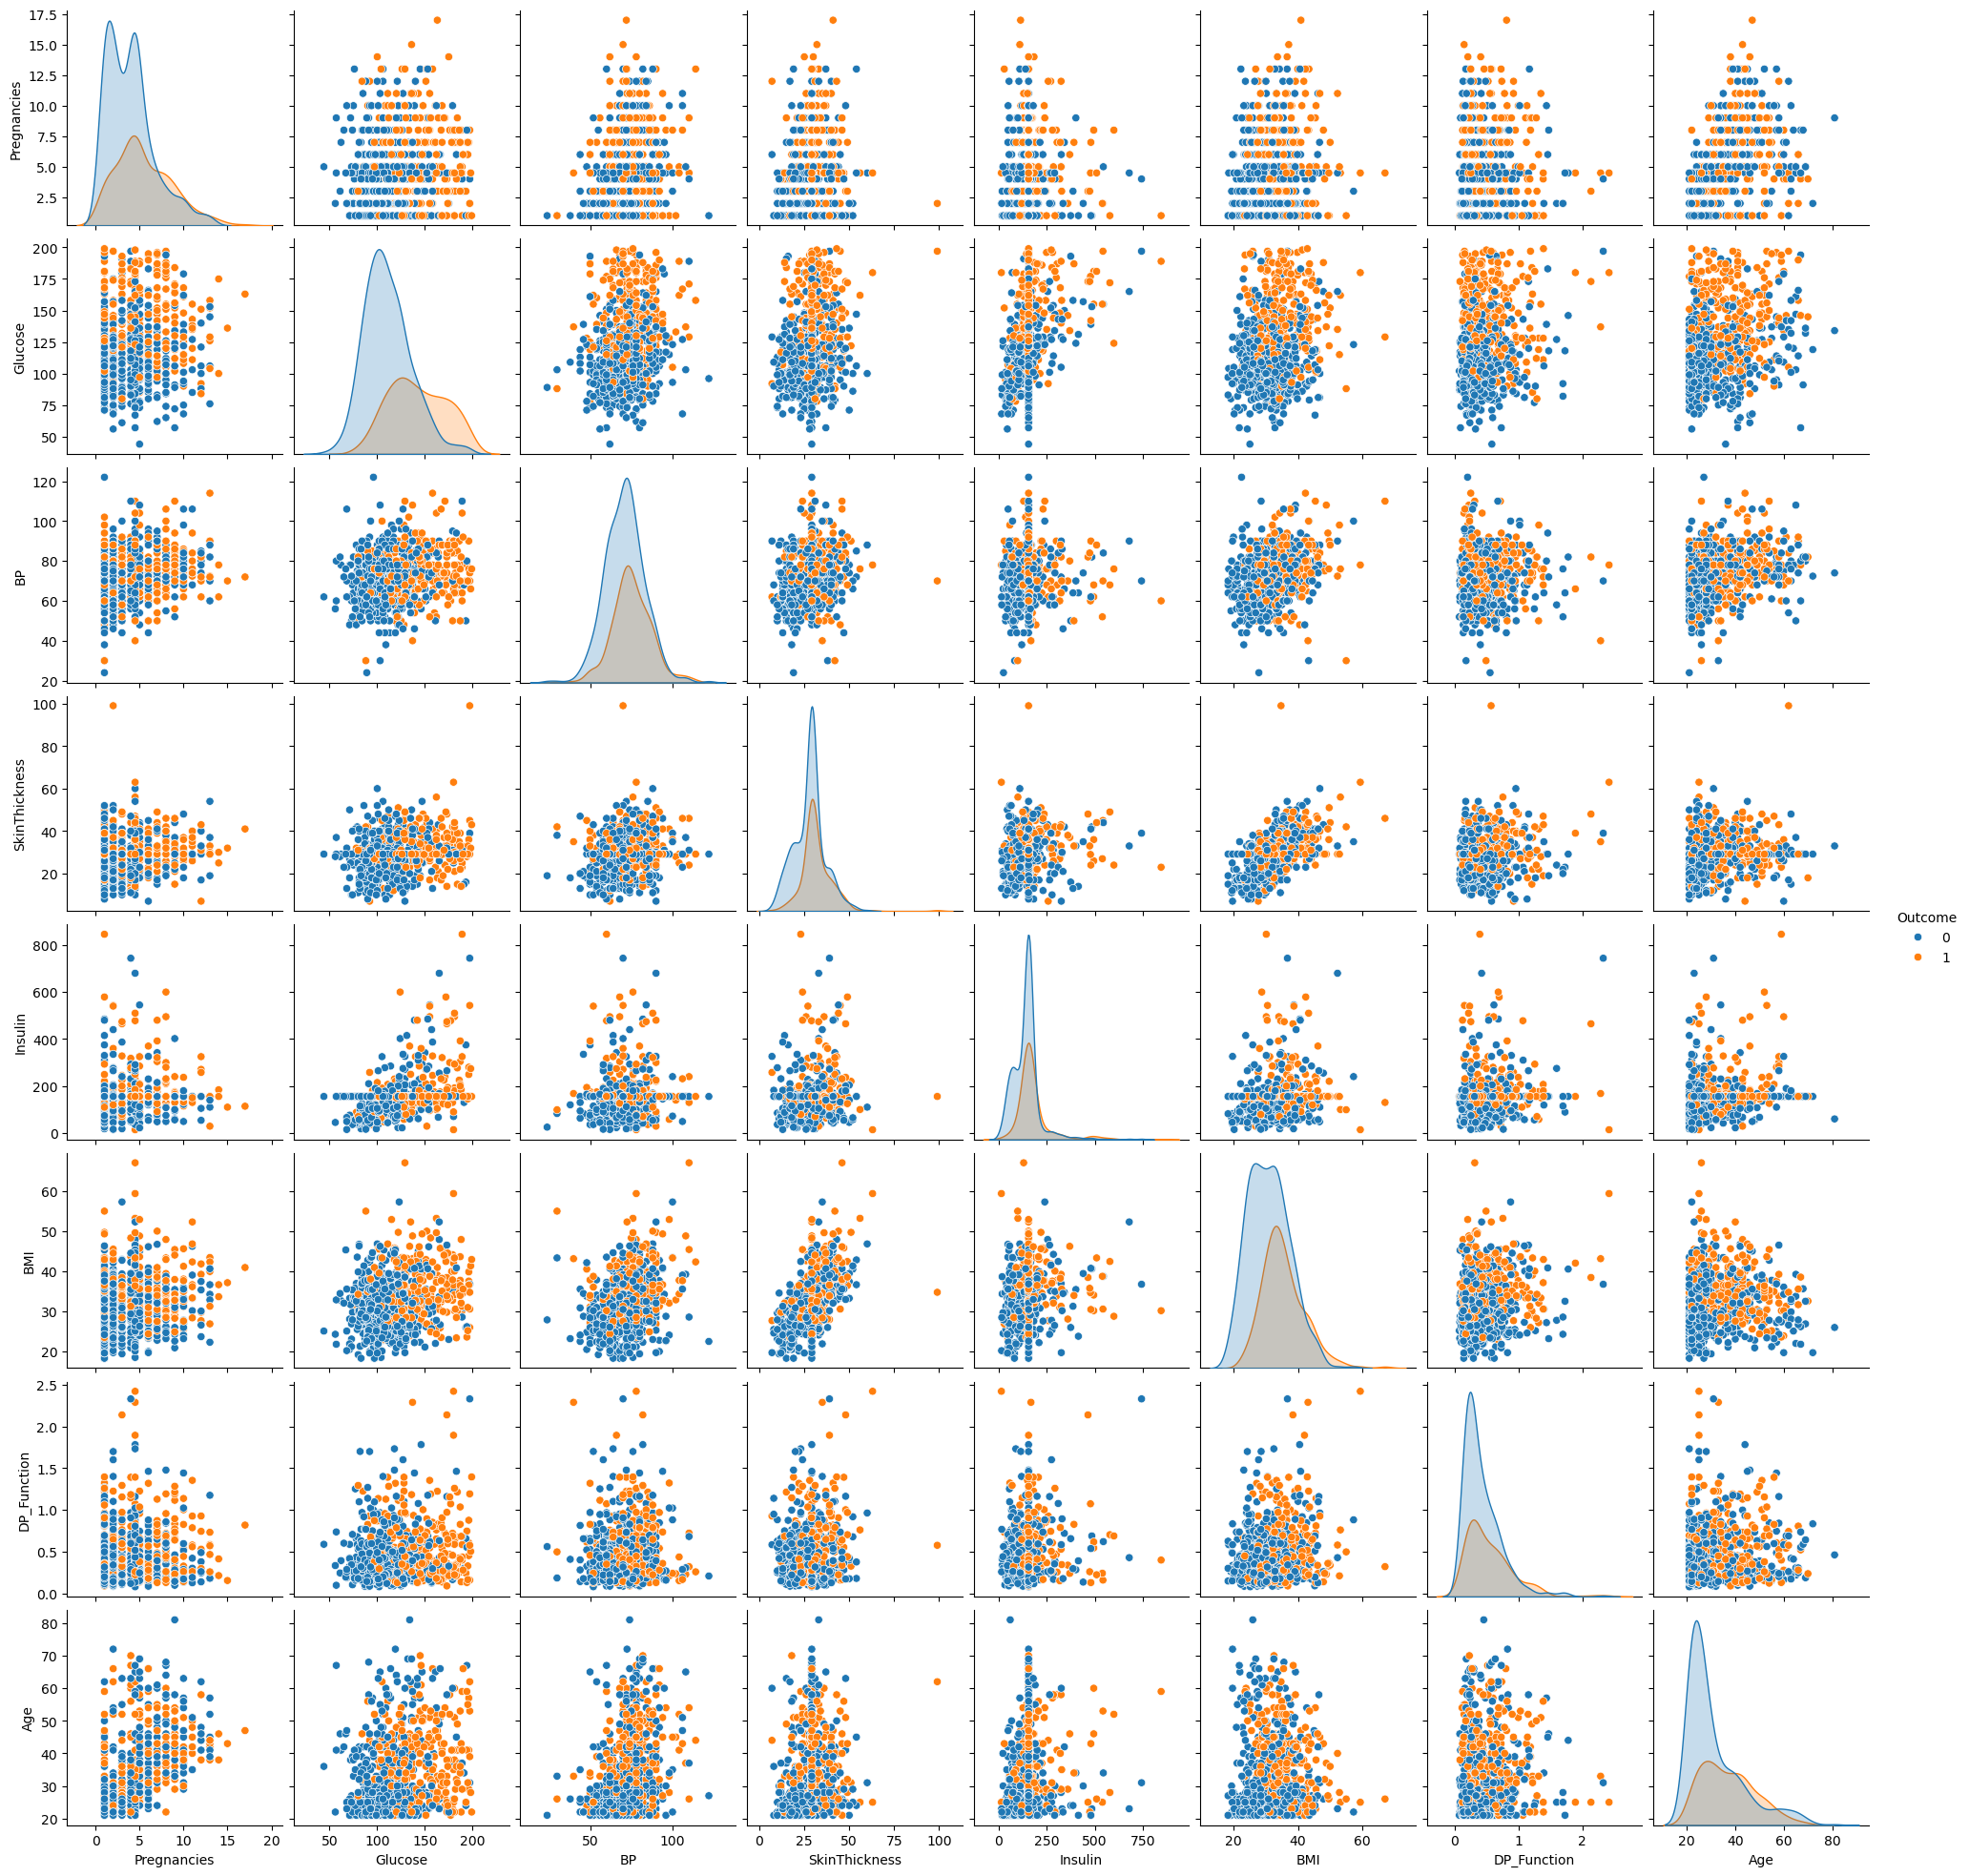

In [452]:
sns.pairplot(df_new, vars=['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','DP_Function','Age'], diag_kind='kde', hue = 'Outcome')
plt.show()

##### Observation, two types of outcome and for all the variables means of the two outcomes are overlapping

In [51]:
feature_cols = ['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','DP_Function','Age']
X = df_new[feature_cols] # Features
y = df_new.Outcome # Target variable

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [549]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=7600)

# fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=7600)

In [551]:
y_pred = logreg.predict(X_test)

In [557]:
model_score = logreg.score(X_test, y_test)
model_score

0.8177083333333334

In [553]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]], dtype=int64)

In [565]:
### Recall = (True Positive)/(True Positive + False Negative) # Accuracy of "Outcome"
False positive: we incorrectly predict that they do have diabetes. Type 1 error
False Negative: we incorrectly predict that they don't have diabetes, Type 2 error.
### Recall = tp/(tp + FP)
Recall_D = 42/(42+25)
Recall_D # Recall for diabatic class

0.6268656716417911

In [567]:
Recall_ND = 115/(115+10)
Recall_ND  # Recall for non-diabatic class

0.92

In [593]:
print(classification_report(y_test, y_pred)) # 0 means non-diabetics and 1 means diabetics

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       125
           1       0.81      0.63      0.71        67

    accuracy                           0.82       192
   macro avg       0.81      0.77      0.79       192
weighted avg       0.82      0.82      0.81       192



##### Solution: Up sampling is to create synthetic data. Generate synthetic data for the diabetic class (under presentated) using K nearest neighbors. Cancel the bias error by up samplying. 

##### We need flip the recall value to have better prediction. Success of the model prediction depends on the data analytics (e.g., feature engineering, feature selection) not the model. Also lower the threshold value to identify more diabetic class. Use funtion called binarize from sklearn to control teh threshold.

##### Resource: Code for Pima Indians Diabetics dataset
##### https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/blob/master/Pima%20Indians%20Diabetes%20Dataset.ipynb

In [47]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred = model.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       125
           1       0.77      0.64      0.70        67

    accuracy                           0.81       192
   macro avg       0.80      0.77      0.78       192
weighted avg       0.80      0.81      0.80       192

[[112  13]
 [ 24  43]]
